<a href="https://colab.research.google.com/github/cwilbar04/nba-predictions/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.colab import files
from datetime import datetime

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
my_project_id = "nba-predictions-dev"
my_project_id

'nba-predictions-dev'

In [8]:
%%bigquery --project nba-predictions-dev game
  SELECT * from `nba.raw_basketballreference_game`

In [9]:
%%bigquery --project nba-predictions-dev player
  SELECT * from `nba.raw_basketballreference_playerbox`

In [10]:
game.head()

,game_date,game_start_time,visitor_team_name,away_abbr,visitor_pts,home_team_name,home_abbr,home_pts,box_score_url,attendance,overtimes,game_key,a_g1_score,a_g2_score,a_g3_score,a_g4_score,h_g1_score,h_g2_score,h_g3_score,h_g4_score,a_ff_pace,a_ff_efg_pct,a_ff_tov_pct,a_ff_orb_pct,a_ff_ft_rate,a_ff_off_rtg,h_ff_pace,h_ff_efg_pct,h_ff_tov_pct,h_ff_orb_pct,h_ff_ft_rate,h_ff_off_rtg,load_datetime,a_g5_score,h_g5_score,a_g6_score,h_g6_score
0,2015-11-29,2:00p,Milwaukee Bucks,MIL,82,Charlotte Hornets,CHO,87,/boxscores/201511290CHO.html,"14,224",,MIL20151129CHO200p,28,9,22,23,22,23,20,22,85.7,.451,13.7,26.5,.098,95.7,85.7,.493,14.0,17.5,.257,101.5,2021-02-24 21:15:57+00:00,None,None,None,None
1,2015-11-29,3:30p,Minnesota Timberwolves,MIN,99,Los Angeles Clippers,LAC,107,/boxscores/201511290LAC.html,"19,060",,MIN20151129LAC330p,19,18,24,38,23,25,23,36,94.5,.500,12.5,17.9,.207,104.7,94.5,.573,12.7,17.9,.280,113.2,2021-02-24 21:15:58+00:00,None,None,None,None
2,2015-11-29,6:00p,Detroit Pistons,DET,83,Brooklyn Nets,BRK,87,/boxscores/201511290BRK.html,"12,823",,DET20151129BRK600p,22,19,26,16,18,17,24,28,99.7,.366,11.3,30.2,.089,83.3,99.7,.457,17.8,17.9,.160,87.3,2021-02-24 21:15:58+00:00,None,None,None,None
3,2015-11-29,6:00p,Philadelphia 76ers,PHI,84,Memphis Grizzlies,MEM,92,/boxscores/201511290MEM.html,"15,322",,PHI20151129MEM600p,13,18,36,17,21,16,27,28,100.5,.468,22.9,19.0,.156,83.6,100.5,.444,21.9,31.3,.247,91.6,2021-02-24 21:15:59+00:00,None,None,None,None
4,2015-11-29,6:00p,Boston Celtics,BOS,91,Orlando Magic,ORL,110,/boxscores/201511290ORL.html,"16,209",,BOS20151129ORL600p,20,25,22,24,21,32,31,26,93.9,.438,10.2,19.6,.159,97.0,93.9,.532,11.5,40.5,.118,117.2,2021-02-24 21:16:00+00:00,None,None,None,None


In [11]:
player.head()

,game_key,game_date,h_or_a,team_abbrev,stat_period,player,player_link,player_key,reason,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,plus_minus,player_stat_key,starter_flag,load_datetime
0,POR20191212DEN1030p,2019-12-12,a,POR,game,Hassan Whiteside,/players/w/whiteha01.html,whiteha01,None,35:07,15,21,.714,1,1,1.000,2,2,1.000,3,8,11,2,0,4,0,5,33,-3,POR20191212DEN1030p|whiteha01|game,True,2021-02-24 21:16:47+00:00
1,DAL20191212DET900p,2019-12-12,a,DAL,game,Seth Curry,/players/c/curryse01.html,curryse01,None,33:31,11,15,.733,6,9,.667,2,3,.667,3,4,7,4,2,0,3,2,30,+5,DAL20191212DET900p|curryse01|game,False,2021-02-24 21:16:47+00:00
2,CLE20191212SAS830p,2019-12-12,a,CLE,game,Kevin Love,/players/l/loveke01.html,loveke01,None,38:33,11,24,.458,4,9,.444,4,5,.800,2,15,17,2,0,0,2,3,30,+14,CLE20191212SAS830p|loveke01|game,True,2021-02-24 21:16:46+00:00
3,PHI20191212BOS800p,2019-12-12,h,BOS,game,Kemba Walker,/players/w/walkeke02.html,walkeke02,None,36:20,8,21,.381,5,13,.385,8,10,.800,0,1,1,8,0,1,1,2,29,+2,PHI20191212BOS800p|walkeke02|game,True,2021-02-24 21:16:45+00:00
4,DAL20191212DET900p,2019-12-12,a,DAL,game,Luka Don\xc4\x8di\xc4\x87,/players/d/doncilu01.html,doncilu01,None,33:39,14,24,.583,6,13,.462,7,12,.583,1,11,12,11,0,0,3,2,41,+29,DAL20191212DET900p|doncilu01|game,True,2021-02-24 21:16:47+00:00


In [12]:
game.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,game_date,game_start_time,visitor_team_name,away_abbr,visitor_pts,home_team_name,home_abbr,home_pts,box_score_url,attendance,overtimes,game_key,a_g1_score,a_g2_score,a_g3_score,a_g4_score,h_g1_score,h_g2_score,h_g3_score,h_g4_score,a_ff_pace,a_ff_efg_pct,a_ff_tov_pct,a_ff_orb_pct,a_ff_ft_rate,a_ff_off_rtg,h_ff_pace,h_ff_efg_pct,h_ff_tov_pct,h_ff_orb_pct,h_ff_ft_rate,h_ff_off_rtg,load_datetime,a_g5_score,h_g5_score,a_g6_score,h_g6_score
count,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,7250,418,418,51,51
unique,1121,25,30,30,87,30,30,88,7085,3040,5,7085,43,40,44,44,42,44,44,42,317,363,212,328,400,613,317,366,208,333,410,618,5559,21,22,14,16
top,2017-02-15,8:00p,Boston Celtics,BOS,109,Golden State Warriors,GSW,104,/boxscores/201702110CHO.html,0,,BOS20170211UTA1000p,26,26,27,26,29,27,26,25,97.9,.500,10.3,25.0,.198,106.3,97.9,.500,13.0,25.0,.247,114.4,2021-02-24 21:14:17+00:00,12,9,9,9
freq,28,1654,268,268,242,275,275,252,2,345,6832,2,502,492,481,516,493,517,495,503,69,239,98,206,94,40,69,219,104,190,91,41,4,46,49,9,8
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-24 16:41:49+00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-24 22:22:20+00:00,NaN,NaN,NaN,NaN


In [13]:
player.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,game_key,game_date,h_or_a,team_abbrev,stat_period,player,player_link,player_key,reason,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,plus_minus,player_stat_key,starter_flag,load_datetime
count,190465,190465,190465,190465,190465,190465,190465,190465,31565,158900,158900,158900,151738,158900,158900,115529,158900,158900,90317,158900,158900,158900,158900,158900,158900,158900,158900,158900,158868,190465,190465,190465
unique,7085,1121,2,30,1,1077,1077,1077,4,2932,25,45,258,15,25,92,25,31,126,16,24,30,25,10,12,13,7,64,100,180105,2,5880
top,OKC20170303PHO900p,2017-02-15,h,TOR,game,P.J. Tucker,/players/t/tuckepj01.html,tuckepj01,Did Not Play,12:00,1,5,.500,0,0,.000,0,0,1.000,0,1,2,0,0,0,0,1,0,0,CLE20170324CHO700p|irvinky01|game,False,2021-02-24 21:14:37+00:00
freq,52,720,95339,6996,190465,521,521,521,27509,463,22748,11721,20599,81208,43371,37837,74034,68583,40303,80243,27612,22189,44750,84754,109623,57255,39045,17137,6927,2,115555,104
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-24 16:41:49+00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-24 22:22:20+00:00


In [16]:
game['home_spread'] = game['home_pts'].astype(int) - game['visitor_pts'].astype(int)

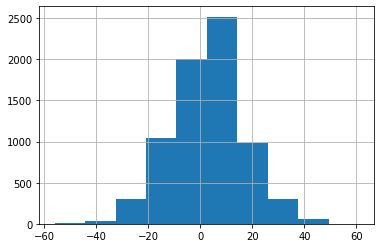

In [19]:
game['home_spread'].hist()

In [87]:
game['season'] = ''
for i in range(len(game)-1):
  if ((game['game_date'][i].year != 2020 and game['game_date'][i].month < 7) or (game['game_date'][i].year == 2020 and game['game_date'][i].month < 11)):
    game.loc[i,'season'] = game['game_date'][i].year
  else:
    game.loc[i,'season'] = game['game_date'][i].year + 1


In [88]:
game.head()

,game_date,game_start_time,visitor_team_name,away_abbr,visitor_pts,home_team_name,home_abbr,home_pts,box_score_url,attendance,overtimes,game_key,a_g1_score,a_g2_score,a_g3_score,a_g4_score,h_g1_score,h_g2_score,h_g3_score,h_g4_score,a_ff_pace,a_ff_efg_pct,a_ff_tov_pct,a_ff_orb_pct,a_ff_ft_rate,a_ff_off_rtg,h_ff_pace,h_ff_efg_pct,h_ff_tov_pct,h_ff_orb_pct,h_ff_ft_rate,h_ff_off_rtg,load_datetime,a_g5_score,h_g5_score,a_g6_score,h_g6_score,home_spread,season
0,2015-11-29,2:00p,Milwaukee Bucks,MIL,82,Charlotte Hornets,CHO,87,/boxscores/201511290CHO.html,"14,224",,MIL20151129CHO200p,28,9,22,23,22,23,20,22,85.7,.451,13.7,26.5,.098,95.7,85.7,.493,14.0,17.5,.257,101.5,2021-02-24 21:15:57+00:00,None,None,None,None,5,2016
1,2015-11-29,3:30p,Minnesota Timberwolves,MIN,99,Los Angeles Clippers,LAC,107,/boxscores/201511290LAC.html,"19,060",,MIN20151129LAC330p,19,18,24,38,23,25,23,36,94.5,.500,12.5,17.9,.207,104.7,94.5,.573,12.7,17.9,.280,113.2,2021-02-24 21:15:58+00:00,None,None,None,None,8,2016
2,2015-11-29,6:00p,Detroit Pistons,DET,83,Brooklyn Nets,BRK,87,/boxscores/201511290BRK.html,"12,823",,DET20151129BRK600p,22,19,26,16,18,17,24,28,99.7,.366,11.3,30.2,.089,83.3,99.7,.457,17.8,17.9,.160,87.3,2021-02-24 21:15:58+00:00,None,None,None,None,4,2016
3,2015-11-29,6:00p,Philadelphia 76ers,PHI,84,Memphis Grizzlies,MEM,92,/boxscores/201511290MEM.html,"15,322",,PHI20151129MEM600p,13,18,36,17,21,16,27,28,100.5,.468,22.9,19.0,.156,83.6,100.5,.444,21.9,31.3,.247,91.6,2021-02-24 21:15:59+00:00,None,None,None,None,8,2016
4,2015-11-29,6:00p,Boston Celtics,BOS,91,Orlando Magic,ORL,110,/boxscores/201511290ORL.html,"16,209",,BOS20151129ORL600p,20,25,22,24,21,32,31,26,93.9,.438,10.2,19.6,.159,97.0,93.9,.532,11.5,40.5,.118,117.2,2021-02-24 21:16:00+00:00,None,None,None,None,19,2016


In [46]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7250 entries, 0 to 7249
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   game_date          7250 non-null   object             
 1   game_start_time    7250 non-null   object             
 2   visitor_team_name  7250 non-null   object             
 3   away_abbr          7250 non-null   object             
 4   visitor_pts        7250 non-null   object             
 5   home_team_name     7250 non-null   object             
 6   home_abbr          7250 non-null   object             
 7   home_pts           7250 non-null   object             
 8   box_score_url      7250 non-null   object             
 9   attendance         7250 non-null   object             
 10  overtimes          7250 non-null   object             
 11  game_key           7250 non-null   object             
 12  a_g1_score         7250 non-null   object       

In [109]:
games_by_team_home = pd.DataFrame()
games_by_team_home['season'] = game['season']
games_by_team_home['game_key'] = game['game_key'] + 'h'
games_by_team_home['game_date'] = pd.to_datetime(game['game_date'])
games_by_team_home['team'] = game['home_team_name']
games_by_team_home['opponent'] = game['visitor_team_name']
games_by_team_home['home?'] = 1
games_by_team_home['spread'] = game['home_spread']
games_by_team_home['pace'] = game['h_ff_pace']
games_by_team_home['efg_pct'] = game['h_ff_efg_pct']
games_by_team_home['tov_pct'] = game['h_ff_tov_pct']
games_by_team_home['ft_rate'] = game['h_ff_ft_rate']
games_by_team_home['off_rtg'] = game['h_ff_off_rtg']
games_by_team_home['opponent_pace'] = game['a_ff_pace']
games_by_team_home['opponent_efg_pct'] = game['a_ff_efg_pct']
games_by_team_home['opponent_tov_pct'] = game['a_ff_tov_pct']
games_by_team_home['opponent_ft_rate'] = game['a_ff_ft_rate']
games_by_team_home['opponent_off_rtg'] = game['a_ff_off_rtg']


games_by_team_home['result'] = ''
for i in range(len(game)-1):
  games_by_team_home.loc[i,'result'] = 1 if game['home_spread'][i].astype(int) > 0 else 0

In [110]:
games_by_team_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7250 entries, 0 to 7249
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   season            7250 non-null   object        
 1   game_key          7250 non-null   object        
 2   game_date         7250 non-null   datetime64[ns]
 3   team              7250 non-null   object        
 4   opponent          7250 non-null   object        
 5   home?             7250 non-null   int64         
 6   spread            7250 non-null   int64         
 7   pace              7250 non-null   object        
 8   efg_pct           7250 non-null   object        
 9   tov_pct           7250 non-null   object        
 10  ft_rate           7250 non-null   object        
 11  off_rtg           7250 non-null   object        
 12  opponent_pace     7250 non-null   object        
 13  opponent_efg_pct  7250 non-null   object        
 14  opponent_tov_pct  7250 n

In [111]:
games_by_team_visitor = pd.DataFrame()
games_by_team_visitor ['season'] = game['season']
games_by_team_visitor ['game_key'] = game['game_key'] + 'a'
games_by_team_visitor ['game_date'] = pd.to_datetime(game['game_date'])
games_by_team_visitor ['team'] = game['visitor_team_name']
games_by_team_visitor ['opponent'] = game['home_team_name']
games_by_team_visitor ['home?'] = 0
games_by_team_visitor ['spread'] = game['home_spread']*-1
games_by_team_visitor ['pace'] = game['a_ff_pace']
games_by_team_visitor ['efg_pct'] = game['a_ff_efg_pct']
games_by_team_visitor ['tov_pct'] = game['a_ff_tov_pct']
games_by_team_visitor ['ft_rate'] = game['a_ff_ft_rate']
games_by_team_visitor ['off_rtg'] = game['a_ff_off_rtg']
games_by_team_visitor['opponent_pace'] = game['h_ff_pace']
games_by_team_visitor['opponent_efg_pct'] = game['h_ff_efg_pct']
games_by_team_visitor['opponent_tov_pct'] = game['h_ff_tov_pct']
games_by_team_visitor['opponent_ft_rate'] = game['h_ff_ft_rate']
games_by_team_visitor['opponent_off_rtg'] = game['h_ff_off_rtg']

games_by_team_visitor['result'] = ''
for i in range(len(game)-1):
  games_by_team_visitor.loc[i,'result'] = 1 if game['home_spread'][i].astype(int) < 0 else 0

In [112]:
games_by_team_visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7250 entries, 0 to 7249
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   season            7250 non-null   object        
 1   game_key          7250 non-null   object        
 2   game_date         7250 non-null   datetime64[ns]
 3   team              7250 non-null   object        
 4   opponent          7250 non-null   object        
 5   home?             7250 non-null   int64         
 6   spread            7250 non-null   int64         
 7   pace              7250 non-null   object        
 8   efg_pct           7250 non-null   object        
 9   tov_pct           7250 non-null   object        
 10  ft_rate           7250 non-null   object        
 11  off_rtg           7250 non-null   object        
 12  opponent_pace     7250 non-null   object        
 13  opponent_efg_pct  7250 non-null   object        
 14  opponent_tov_pct  7250 n

In [113]:
frames = [games_by_team_home,games_by_team_visitor]
games_by_team = pd.concat(frames)

In [114]:
games_by_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14500 entries, 0 to 7249
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   season            14500 non-null  object        
 1   game_key          14500 non-null  object        
 2   game_date         14500 non-null  datetime64[ns]
 3   team              14500 non-null  object        
 4   opponent          14500 non-null  object        
 5   home?             14500 non-null  int64         
 6   spread            14500 non-null  int64         
 7   pace              14500 non-null  object        
 8   efg_pct           14500 non-null  object        
 9   tov_pct           14500 non-null  object        
 10  ft_rate           14500 non-null  object        
 11  off_rtg           14500 non-null  object        
 12  opponent_pace     14500 non-null  object        
 13  opponent_efg_pct  14500 non-null  object        
 14  opponent_tov_pct  14500

In [115]:
games_by_team.head()

,season,game_key,game_date,team,opponent,home?,spread,pace,efg_pct,tov_pct,ft_rate,off_rtg,opponent_pace,opponent_efg_pct,opponent_tov_pct,opponent_ft_rate,opponent_off_rtg,result
0,2016,MIL20151129CHO200ph,2015-11-29,Charlotte Hornets,Milwaukee Bucks,1,5,85.7,.493,14.0,.257,101.5,85.7,.451,13.7,.098,95.7,1
1,2016,MIN20151129LAC330ph,2015-11-29,Los Angeles Clippers,Minnesota Timberwolves,1,8,94.5,.573,12.7,.280,113.2,94.5,.500,12.5,.207,104.7,1
2,2016,DET20151129BRK600ph,2015-11-29,Brooklyn Nets,Detroit Pistons,1,4,99.7,.457,17.8,.160,87.3,99.7,.366,11.3,.089,83.3,1
3,2016,PHI20151129MEM600ph,2015-11-29,Memphis Grizzlies,Philadelphia 76ers,1,8,100.5,.444,21.9,.247,91.6,100.5,.468,22.9,.156,83.6,1
4,2016,BOS20151129ORL600ph,2015-11-29,Orlando Magic,Boston Celtics,1,19,93.9,.532,11.5,.118,117.2,93.9,.438,10.2,.159,97.0,1


In [108]:
player.head()

,game_key,game_date,h_or_a,team_abbrev,stat_period,player,player_link,player_key,reason,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,plus_minus,player_stat_key,starter_flag,load_datetime
0,POR20191212DEN1030p,2019-12-12,a,POR,game,Hassan Whiteside,/players/w/whiteha01.html,whiteha01,None,35:07,15,21,.714,1,1,1.000,2,2,1.000,3,8,11,2,0,4,0,5,33,-3,POR20191212DEN1030p|whiteha01|game,True,2021-02-24 21:16:47+00:00
1,DAL20191212DET900p,2019-12-12,a,DAL,game,Seth Curry,/players/c/curryse01.html,curryse01,None,33:31,11,15,.733,6,9,.667,2,3,.667,3,4,7,4,2,0,3,2,30,+5,DAL20191212DET900p|curryse01|game,False,2021-02-24 21:16:47+00:00
2,CLE20191212SAS830p,2019-12-12,a,CLE,game,Kevin Love,/players/l/loveke01.html,loveke01,None,38:33,11,24,.458,4,9,.444,4,5,.800,2,15,17,2,0,0,2,3,30,+14,CLE20191212SAS830p|loveke01|game,True,2021-02-24 21:16:46+00:00
3,PHI20191212BOS800p,2019-12-12,h,BOS,game,Kemba Walker,/players/w/walkeke02.html,walkeke02,None,36:20,8,21,.381,5,13,.385,8,10,.800,0,1,1,8,0,1,1,2,29,+2,PHI20191212BOS800p|walkeke02|game,True,2021-02-24 21:16:45+00:00
4,DAL20191212DET900p,2019-12-12,a,DAL,game,Luka Don\xc4\x8di\xc4\x87,/players/d/doncilu01.html,doncilu01,None,33:39,14,24,.583,6,13,.462,7,12,.583,1,11,12,11,0,0,3,2,41,+29,DAL20191212DET900p|doncilu01|game,True,2021-02-24 21:16:47+00:00


In [122]:
player['game_key'] = player['game_key'] + player['h_or_a']

In [156]:
player = player.dropna(subset=['mp', 'plus_minus']).reset_index(drop=True)

In [129]:
player['plus_minus'] = player['plus_minus'].astype(int)

In [135]:
player['mp'].str.replace(':', '.').astype(float)

0         35.07
1         33.31
2         38.33
3         36.20
4         33.39
          ...  
190460    29.27
190461    36.02
190462    28.49
190463    29.15
190464    30.23
Name: mp, Length: 158868, dtype: float64

In [ ]:
player['seconds_played'] = ''
for i in range(len(player)):
  player.loc[i,'seconds_played'] = int(player.loc[i,'mp'].split(':')[0]) * 60 + int(player.loc[i,'mp'].split(':')[1])

In [ ]:
def convert_to_seconds(mp):
  sp = int(mp.split(':')[0]) * 60 + int(mp.split(':')[1])
  return sp

In [169]:
player['seconds_played'].astype(str)

0         2107
1         2011
2         2313
3         2180
4         2019
          ... 
158863    1767
158864    2162
158865    1729
158866    1755
158867        
Name: seconds_played, Length: 158868, dtype: object

In [178]:
player.loc[158867,:]

game_key                         PHI20190129LAL1030pa
game_date                                  2019-01-29
h_or_a                                              a
team_abbrev                                       PHI
stat_period                                      game
player                                    Joel Embiid
player_link                 /players/e/embiijo01.html
player_key                                  embiijo01
reason                                           None
mp                                              30:23
fg                                                  7
fga                                                16
fg_pct                                           .438
fg3                                                 2
fg3a                                                6
fg3_pct                                          .333
ft                                                 12
fta                                                15
ft_pct                      

In [167]:
player['seconds_played']

AttributeError: ignored

In [160]:
player.groupby(['game_key'])['seconds_played'].sum()

TypeError: ignored

In [127]:
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158868 entries, 0 to 190464
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   game_key         158868 non-null  object             
 1   game_date        158868 non-null  object             
 2   h_or_a           158868 non-null  object             
 3   team_abbrev      158868 non-null  object             
 4   stat_period      158868 non-null  object             
 5   player           158868 non-null  object             
 6   player_link      158868 non-null  object             
 7   player_key       158868 non-null  object             
 8   reason           0 non-null       object             
 9   mp               158868 non-null  object             
 10  fg               158868 non-null  object             
 11  fga              158868 non-null  object             
 12  fg_pct           151738 non-null  object             
 13 

In [121]:
player.loc[(player['starter_flag']==True),''].groupby(by='game_key').

array([None], dtype=object)